## Q-learning

This notebook will guide you through implementation of vanilla Q-learning algorithm.

You need to implement QLearningAgent (follow instructions for each method) and use it on a number of tests below.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
from collections import defaultdict
import random
import math
import numpy as np


class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        """
        Q-Learning Agent
        based on https://inst.eecs.berkeley.edu/~cs188/sp19/projects.html
        Instance variables you have access to
          - self.epsilon (exploration prob)
          - self.alpha (learning rate)
          - self.discount (discount rate aka gamma)

        Functions you should use
          - self.get_legal_actions(state) {state, hashable -> list of actions, each is hashable}
            which returns legal actions for a state
          - self.get_qvalue(state,action)
            which returns Q(state,action)
          - self.set_qvalue(state,action,value)
            which sets Q(state,action) := value

        Note: please avoid using self._qValues directly. 
            There's a special self.get_qvalue/set_qvalue for that.
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        self._qvalues[state][action] = value

    #---------------------START OF YOUR CODE---------------------#

    def get_value(self, state):
        """
        Compute your agent's estimate of V(s) using current q‐values
        V(s) = max_over_action Q(state,action) over possible actions.
        Note: please take into account that q‐values can be negative.
        """
        possible_actions = self.get_legal_actions(state)
        if len(possible_actions) == 0:
            return 0.0
    
        possible_values = [ self.get_qvalue(state, action)
                            for action in possible_actions ]
        value = max(possible_values)
    
        return value


    def update(self, state, action, reward, next_state):
        """
        You should do your Q‐Value update here:
        Q(s,a) = (1 - alpha) * Q(s,a) + alpha * (r + gamma * V(s'))
        """
        gamma = self.discount
        alpha = self.alpha
    
        old_q = self.get_qvalue(state, action)
        target = reward + gamma * self.get_value(next_state)
        new_q = (1 - alpha) * old_q + alpha * target
    
        self.set_qvalue(state, action, new_q)


    def get_best_action(self, state):
        """
        Compute the best action to take in a state (using current q‐values).
        """
        possible_actions = self.get_legal_actions(state)
        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None
    
        # Evaluate Q(s,a) for each action, pick the one with highest value
        possible_q_values = [self.get_qvalue(state, a) for a in possible_actions]
        best_index = np.argmax(possible_q_values)
        best_action = possible_actions[best_index]
    
        return best_action


    def get_action(self, state):
        """
        Compute the action to take in the current state, including exploration.
        With probability self.epsilon, take a random action;
        otherwise take the best action according to current Q-values.
        """
        possible_actions = self.get_legal_actions(state)
        # If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None
    
        # Epsilon‐greedy: with probability epsilon explore, else exploit
        if np.random.random() > self.epsilon:
            return self.get_best_action(state)
        else:
            return random.choice(possible_actions)


### Try it on taxi

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [150]:
import gym
env = gym.make("Taxi-v3")

n_actions = env.action_space.n

In [151]:
agent = QLearningAgent(alpha=0.5,
                       epsilon=0.25,
                       discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

In [159]:
def play_and_train(env, agent, t_max=10**4):
    """
    This function should
      - run a full game, actions given by agent's ε-greedy policy
      - train agent using agent.update(...) whenever it is possible
      - return total reward
    """
    total_reward = 0.0
    s, info = env.reset()

    for t in range(t_max):
        # get agent to pick action given state s
        a = agent.get_action(s)

        # step in the environment
        next_s, r, terminated, truncated, info = env.step(a)
        done = terminated or truncated
        
        # train (update) agent for transition (s, a, r, next_s)
        agent.update(s, a, r, next_s)

        # accumulate reward
        total_reward += r
        s = next_s

        
        if done:
            break

    return total_reward


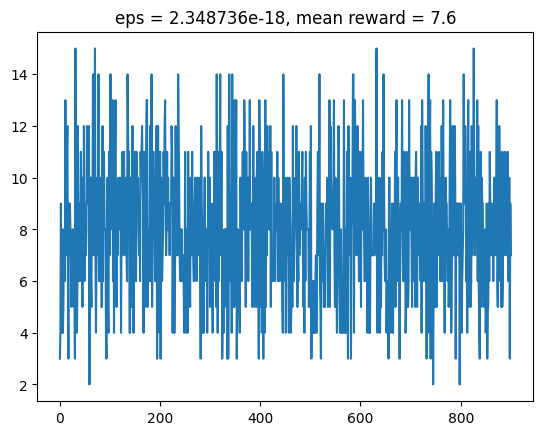

In [160]:
from IPython.display import clear_output

rewards = []
for i in range(1000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        plt.title('eps = {:e}, mean reward = {:.1f}'.format(agent.epsilon, np.mean(rewards[-10:])))
        plt.plot(rewards)
        plt.show()